<a href="https://colab.research.google.com/github/C0RD3LL/Portfolio/blob/main/Metageneomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Metagenomics Starter-Kit..."
This is a blah blah blah 
it shows the basic blah blah balh oh metagenomics and porcesses that I use for analysis 

In [ ]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.1                         
year           2021                        
month          08                          
day            10                          
svn rev        80725                       
language       R                           
version.string R version 4.1.1 (2021-08-10)
nickname       Kick Things                 

In [73]:
suppressWarnings(install.packages(c("dplyr","gridExtra","tibble","tidyverse","ggplot","reshape2")))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Made possible via the link:
https://colab.research.google.com/notebook#create=true&language=r

In [75]:
library('openxlsx')
suppressWarnings(library("dplyr"))
suppressWarnings(library("gridExtra"))
library("tibble")
library("tidyverse")
library(ggplot2)
suppressWarnings(library(reshape2))

In [51]:
OTUtable <- read.xlsx("https://github.com/PineBiotech/bioinformatics/blob/master/17sample-OTU-mat1_phylum1.xlsx?raw=true", sheet = 2)

In [52]:
#sum by phyla
OTUtableGroup <- OTUtable %>% group_by(OTU) %>% summarise_all(funs(sum))
row.names(OTUtableGroup) <- OTUtableGroup$OTU

Warning message:
“Setting row names on a tibble is deprecated.”


In [53]:
OTUtableGroup1 <- OTUtableGroup[rowSums(OTUtableGroup[,2:18])>0, rownames=TRUE]

phylum <- factor(OTUtableGroup1$OTU)
phylum1 <- unique(phylum)


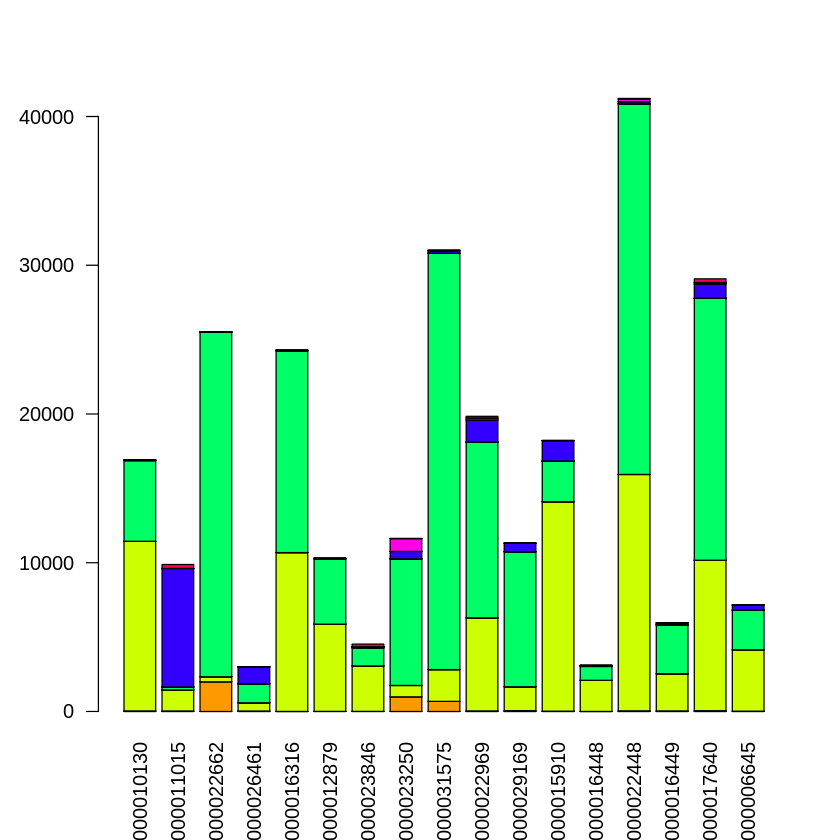

In [54]:
#This is nice, but the colors here are all over the place and we need to simplify the number of phyla we have (56) to the most prominent ones (~20) sum by phyla
df <- as.matrix(OTUtableGroup1[,-1], rownames=TRUE)
barplot(df, las=2, col=rainbow(length(phylum1))) 

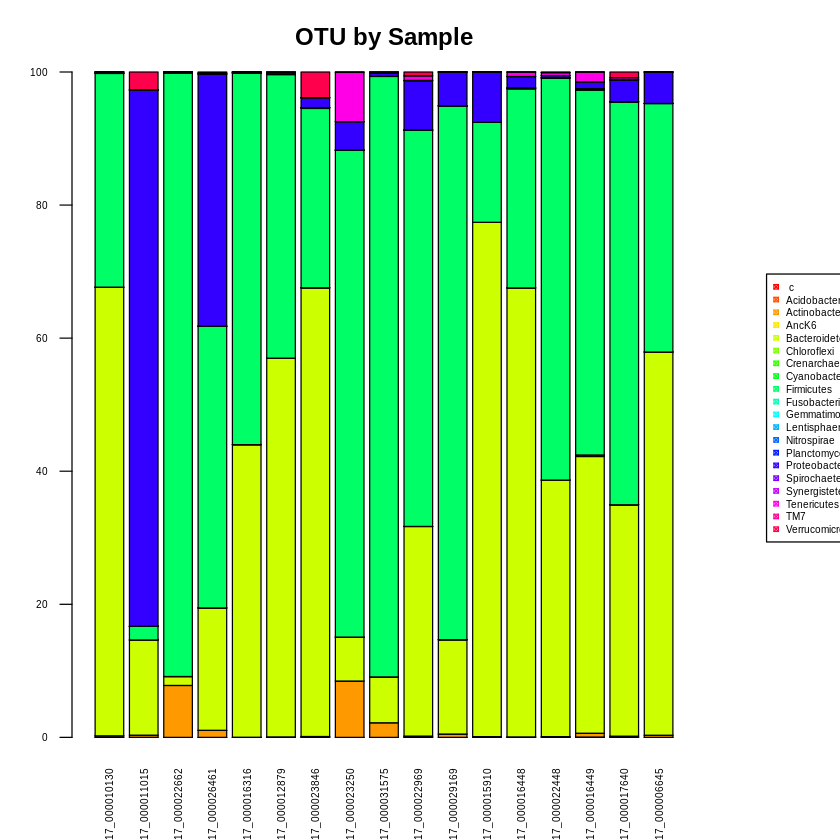

In [56]:
df2 <- as.matrix(as.data.frame(prop.table(as.matrix(df), 2)* 100))
## Plot a barplot with % age
par(mar = c(4, 3, 3, 6),   xpd = TRUE)                                
barplot(df2, las=2, col = rainbow(length(phylum)), cex.axis=0.5, cex.names=0.5, main = "OTU by Sample")
legend("right", inset = c(- 0.3, 0), legend = phylum1, pch = 7, col = rainbow(length(phylum)), cex = 0.5)


In [57]:
#prepare 2 groups
byGroupRarely <- as.matrix(rowMeans(OTUtableGroup1[,2:8]))
byGroupRegularly <- as.matrix(rowMeans(OTUtableGroup1[,9:18]))

#combine into a single data frame
OTUGroups <- cbind(byGroupRarely,byGroupRegularly)
colnames(OTUGroups) <- c("Rarely", "Regularly")
row.names(OTUGroups) <- phylum1

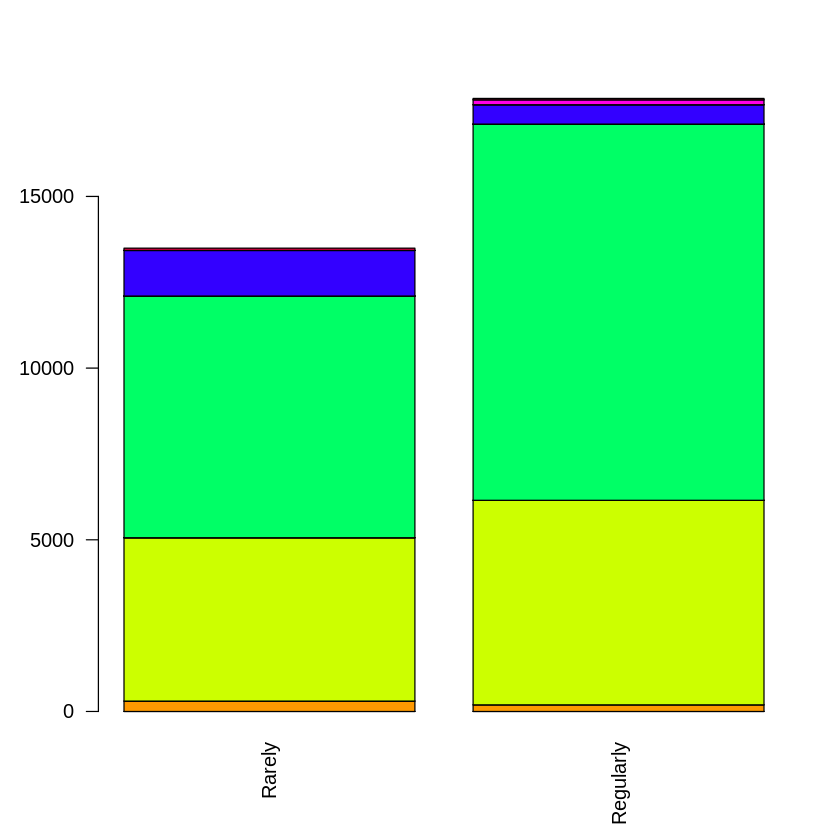

In [59]:
#make a bar plot by group
barplot(OTUGroups, las=2, col=rainbow(length(phylum1)))

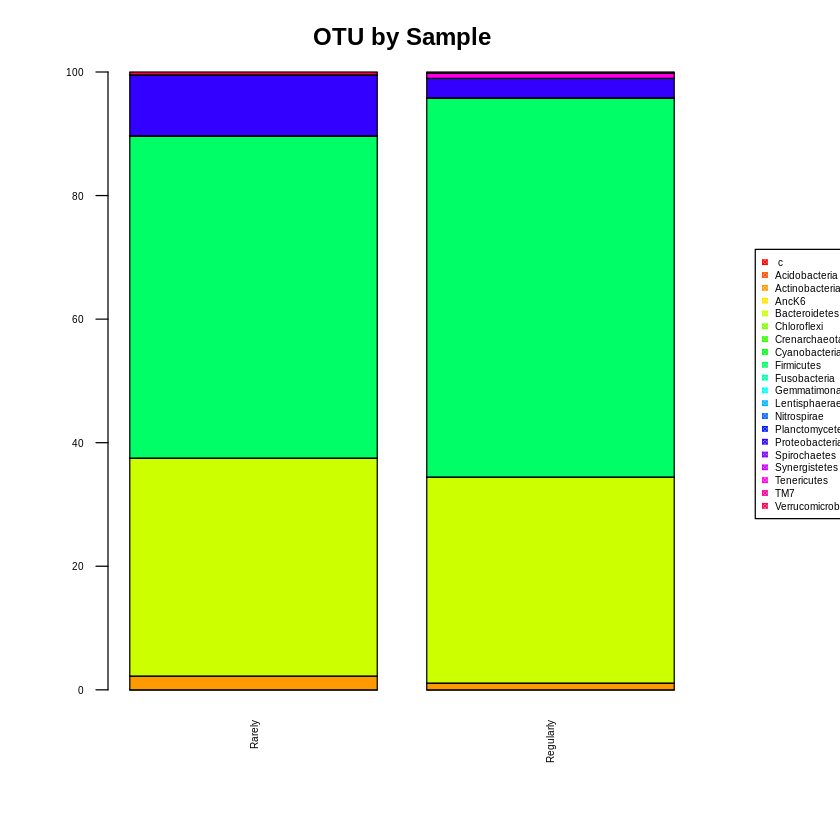

In [62]:
#### Draw a plot with %age in groups
## compute %age 
gr <-  as.matrix(as.data.frame(prop.table(as.matrix(OTUGroups), 2)* 100))

## Draw stack plot
par(mar = c(6, 4.5, 3, 6),   xpd = TRUE)                            
barplot(gr, las=2, col = rainbow(length(phylum)), cex.axis=0.5, cex.names=0.5, main = "OTU by Sample")
legend("right", inset = c(- 0.3, 0), legend = phylum1, pch = 7, col = rainbow(length(phylum)), cex = 0.5)

In [64]:
#calculate statistical significance
OTUGroups <- as.data.frame(OTUGroups)

x=0
for(x in c(1:20)){
  ttest <- t.test(OTUtableGroup1[x,2:8],OTUtableGroup1[x,9:18])
  OTUGroups[x,"TTEST"] <- round(ttest$p.value, digits = 2)
  print(ttest$p.value)
}

[1] 0.3559177
[1] 0.3434364
[1] 0.7287576
[1] 0.3434364
[1] 0.6372091
[1] 0.3093965
[1] 0.3434364
[1] 0.7742682
[1] 0.3891103
[1] 0.7011747
[1] 0.3434364
[1] 0.1763393
[1] 0.3434364
[1] 0.3434364
[1] 0.5220345
[1] 0.3434364
[1] 0.2712461
[1] 0.1204241
[1] 0.1678507
[1] 0.6269965


In [ ]:
#Make a PDF.
pdf("GroupsCompare.pdf")
grid.table(OTUGroups)
dev.off()#Print one sample
print(OTUtableGroup1$S_10317_000011015[5])

Using OTU, category as id variables

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Using phylum, category as id variables



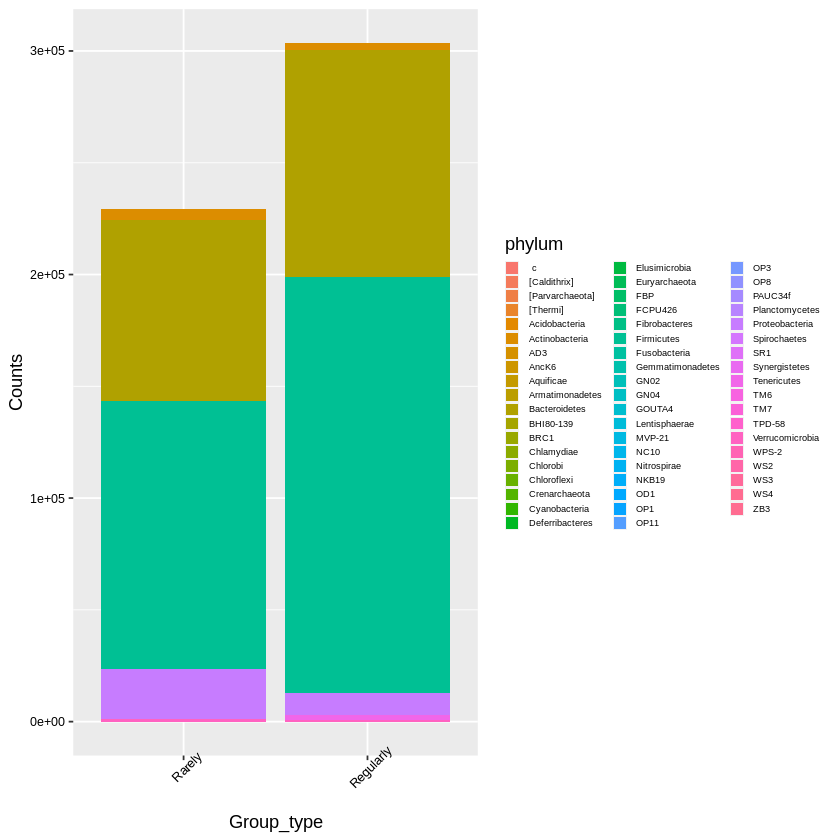

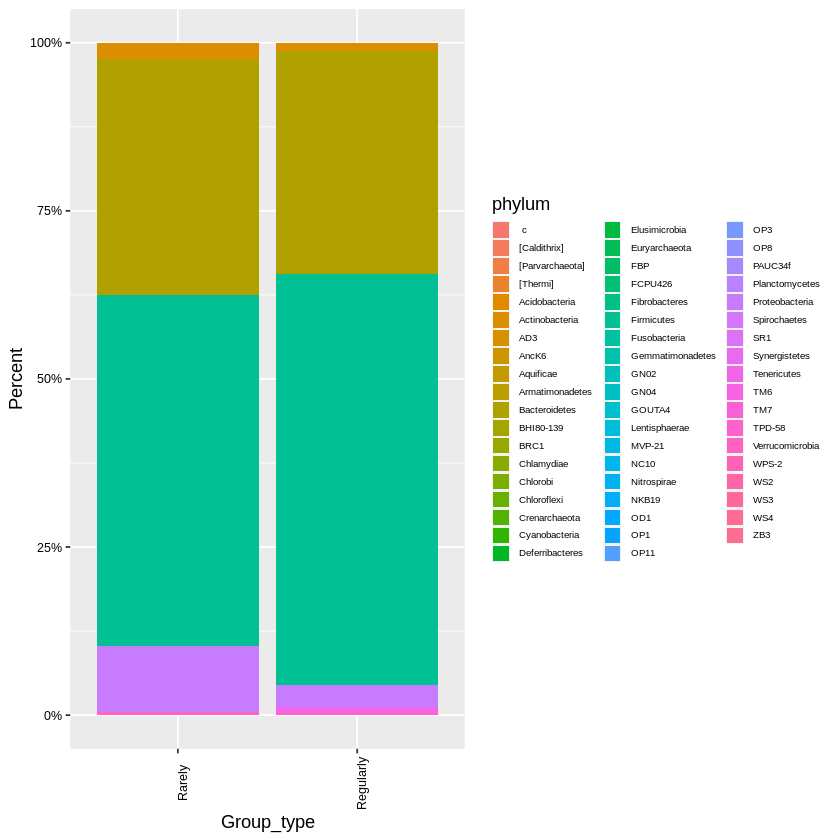

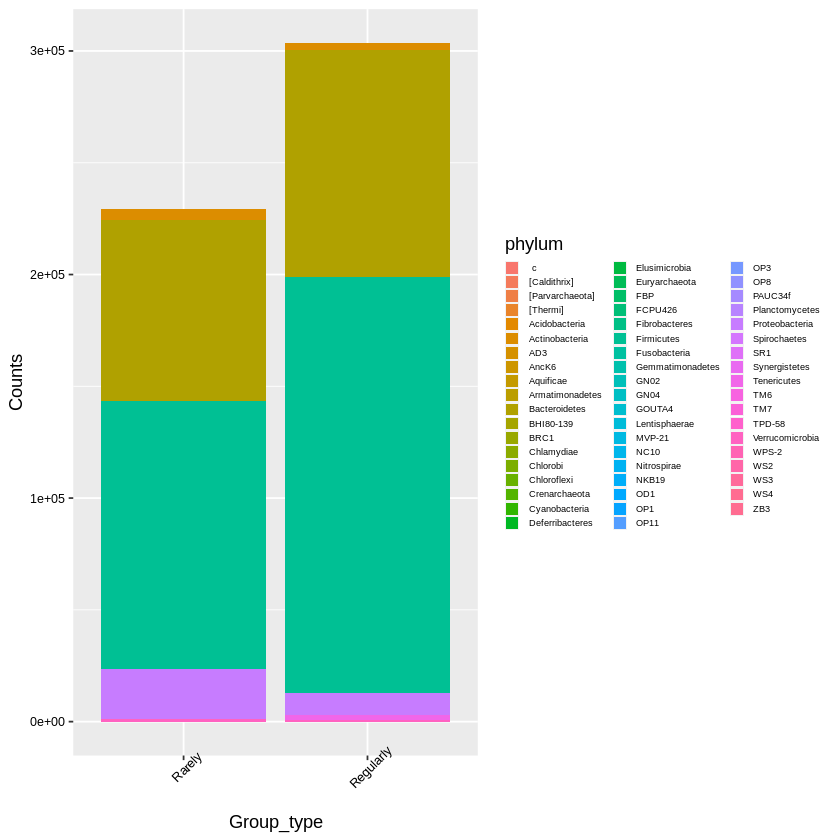

[1] "[Caldithrix]"

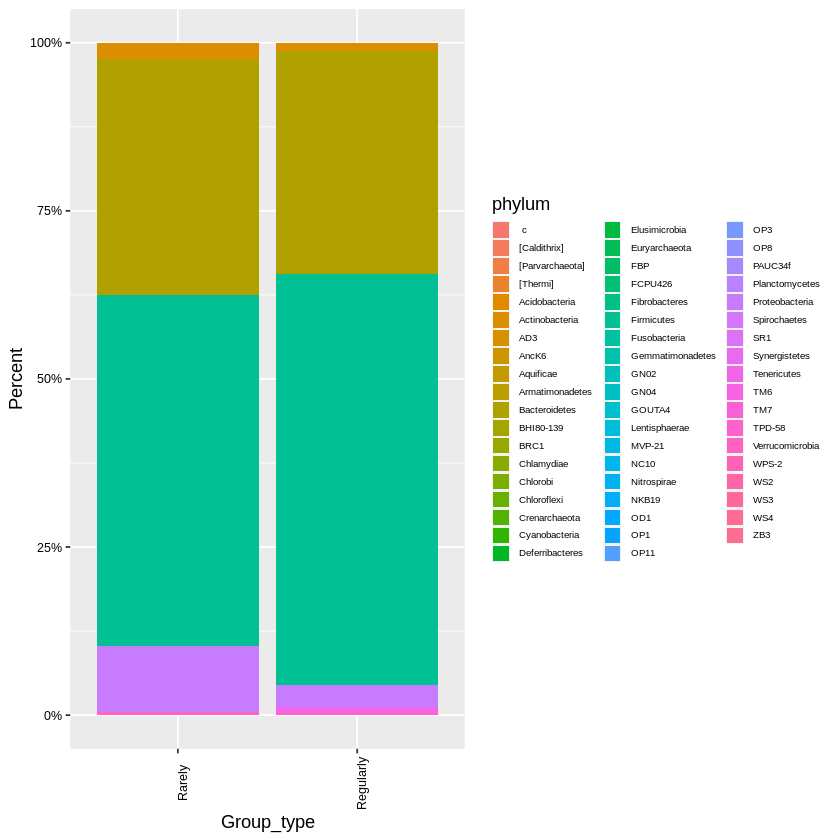

In [77]:


#make dataframe 
df=as.data.frame(OTUtableGroup)

#Change into required  input, so melt the data ###
df$category <- row.names(df)
melted_df <- melt(df)

#Extract phylum
phylum = melted_df$OTU

#Make Groups (Rare and Regular)
Rare<- as.data.frame(rowMeans(df[,2:8]), rownames=TRUE)
Regular <- as.data.frame(rowMeans(df[,9:18]), rownames=TRUE)

#Combine groups together
group <- cbind(Rare, Regular)

#Name the column
colnames(group) <- c("Rarely", "Regularly")

#Create final input group with phylum names
group1 <-cbind(phylum,group)

#make desired input file for plots
group1$category <- row.names(group1)
melted_group <- melt(group1)
Group_type = melted_group$variable

#Extract values

Counts= melted_group$value

#Create plots with counts

ppp <- ggplot(melted_group, aes(x = Group_type, y = Counts)) + geom_col(aes(fill = phylum))
              
ppp + theme(legend.key.size = unit(0.3, "cm"), legend.text = element_text( color="Black", size=5.5), axis.text.x = element_text( color="Black", size=7.5, angle=45), axis.text.y = element_text( color="Black", size=7.5))

#Convert into  Percentage

Percent= round(Counts / sum(Counts) * 100,2)

#Create plots

pppp <- ggplot(melted_group, aes(x = Group_type, y = Percent, fill = phylum)) + 
  geom_bar(position = "fill",stat = "identity") +
  scale_y_continuous(labels = scales::percent_format())

pppp + theme(legend.key.size = unit(0.38, "cm"), legend.text = element_text( color="Black", size=5.8), axis.text.x = element_text( color="Black", size=7.5, angle=90), axis.text.y = element_text( color="Black", size=7.5)) 


#Plot with counts in groups
print (ppp + theme(legend.key.size = unit(0.3, "cm"), legend.text = element_text( color="Black", size=5.5), axis.text.x = element_text( color="Black", size=7.5, angle=45), axis.text.y = element_text( color="Black", size=7.5)))

# Plot with %age in groups
print (pppp + theme(legend.key.size = unit(0.38, "cm"), legend.text = element_text( color="Black", size=5.8), axis.text.x = element_text( color="Black", size=7.5, angle=90), axis.text.y = element_text( color="Black", size=7.5)) )

#print 2nd phylum
head(melted_group$phylum[2])